In [4]:
import csv
import pandas as pd

df = pd.read_csv("fct_invoice.csv")

# Easy

In [5]:
#How many unique customers are in the dataset?

df["customer_id"].nunique()

5191

In [6]:
#What are the different categories of products available?

categories = df["category"].unique()
pd.DataFrame(categories)

0
0         Clothing
1            Shoes
2            Books
3        Cosmetics
4  Food & Beverage
5             Toys
6       Technology
7         Souvenir

In [7]:
#How many unique categories are there?

df["category"].nunique()

8

In [8]:
#Which payment method is the most popular?

popular_payment = df["payment_method"].mode()
pd.DataFrame(popular_payment)

payment_method
0           Cash

In [9]:
#How many times was it used?

df["payment_method"].value_counts().max()

44447

# Medium

In [10]:
#What are the three most popular categories, by total sales?

total_sales = df.groupby("category").sum()["quantity"]
panda_sales = pd.DataFrame(total_sales)

sorted_sales = panda_sales.sort_values(by=["quantity"],ascending=False)
sorted_sales.head(3)

/var/folders/wz/byq7620d3099gr4zqykbrldw0000gn/T/ipykernel_3430/1931186059.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_sales = df.groupby("category").sum()["quantity"]


quantity
category                 
Clothing           103558
Cosmetics           45465
Food & Beverage     44277

In [1]:
#Merging dim_customer.json and fct_invoice.csv

#Converting json to csv

import pandas as pd

df = pd.read_json("dim_customer.json")
df.to_csv("customer.csv")

#Merging into (1) csv

invoice = pd.read_csv("fct_invoice.csv")
customer = pd.read_csv("customer.csv")

customer.rename(columns={"id": "customer_id"}, inplace=True)

new_data = pd.merge(
    invoice,
    customer,
    on = "customer_id"
)

new_data['Sales'] = new_data.price * new_data.quantity

new_data

invoice_no  customer_id   category  quantity    price payment_method  \
0        I138884          229   Clothing         5  1500.40    Credit Card   
1        I126377          229  Cosmetics         2    81.32    Credit Card   
2        I178419          229      Shoes         3  1800.51     Debit Card   
3        I847727          229   Clothing         3   900.24    Credit Card   
4        I219251          229      Shoes         5  3000.85    Credit Card   
...          ...          ...        ...       ...      ...            ...   
99452    I198027         4973      Shoes         1   600.17           Cash   
99453    I989120         6161      Books         5    75.75           Cash   
99454    I791963         6779   Clothing         5  1500.40    Credit Card   
99455    I100582         8386   Clothing         2   600.16           Cash   
99456    I934204         4761  Cosmetics         4   162.64           Cash   

      invoice_date   shopping_mall  Unnamed: 0   age first_name gender  \
0         5/8/2022          Kanyon         229   NaN    William      M   
1         5/4/2021       Metrocity         229   NaN    William      M   
2         1/6/2021    Istinye Park         229   NaN    William      M   
3       21/08/2022    Zorlu Center         229   NaN    William      M   
4       23/06/2022    Istinye Park         229   NaN    William      M   
...            ...             ...         ...   ...        ...    ...   
99452    8/11/2021          Kanyon        4593   NaN    Melissa      F   
99453     8/1/2021  Viaport Outlet        4998  36.0     Leslie      F   
99454     6/3/2021    Metropol AVM        5092   NaN      Kelly      F   
99455    2/11/2021    Istinye Park        5172  47.0      Shawn      M   
99456   31/08/2022  Forum Istanbul        4481  52.0     Ashley      F   

      last_name     Sales  
0      Anderson   7502.00  
1      Anderson    162.64  
2      Anderson   5401.53  
3      Anderson   2700.72  
4      Anderson  15004.25  
...         ...       ...  
99452      Bell    600.17  
99453      Bass    378.75  
99454   Roberts   7502.00  
99455     Perez   1200.32  
99456   Jackson    650.56  

[99457 rows x 14 columns]

In [2]:
#What are the total sales (items, not transactions) attributed to customers over the age of 45?

over_45 = new_data[new_data["age"] > 45]

over_45.sum()["Sales"] 

82039768.15

Text(0.5, 1.0, 'Transactions throughout Invoice Dates')

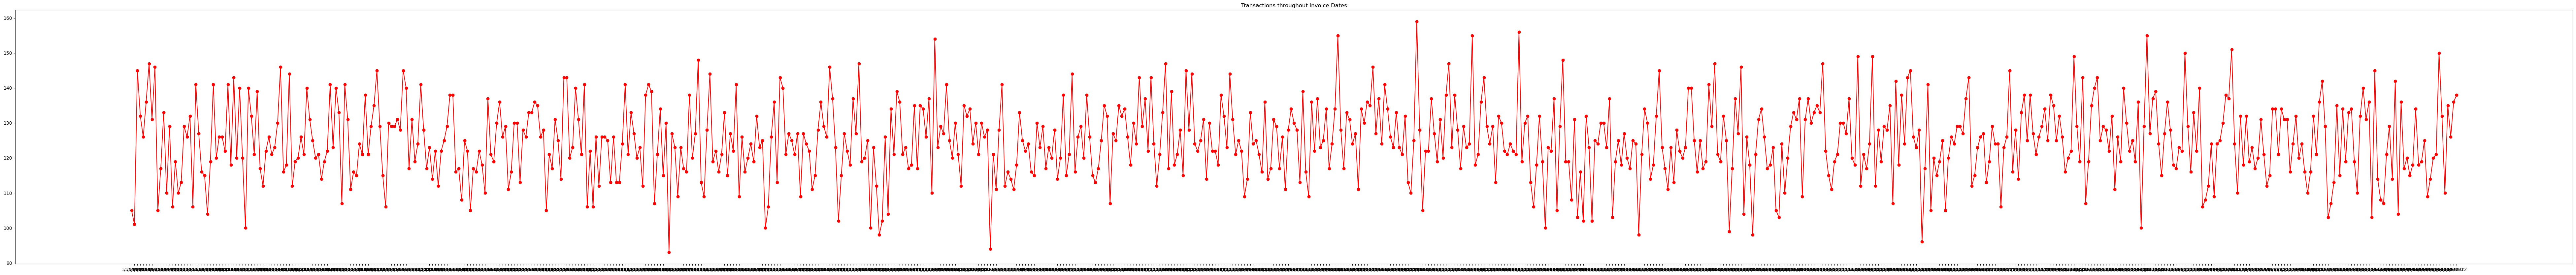

In [18]:
#How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

date_data = new_data.sort_values(by=["invoice_date"],ascending=True)
dateD_data = date_data["invoice_date"].value_counts(sort=False)

import matplotlib.pyplot as plt

plt.figure(figsize = (100,10))
plt.plot(dateD_data, '-o', color='red')
plt.title('Transactions throughout Invoice Dates')

Text(0.5, 1.0, 'Popularity of Payment Methods Throughout Invoice Dates')

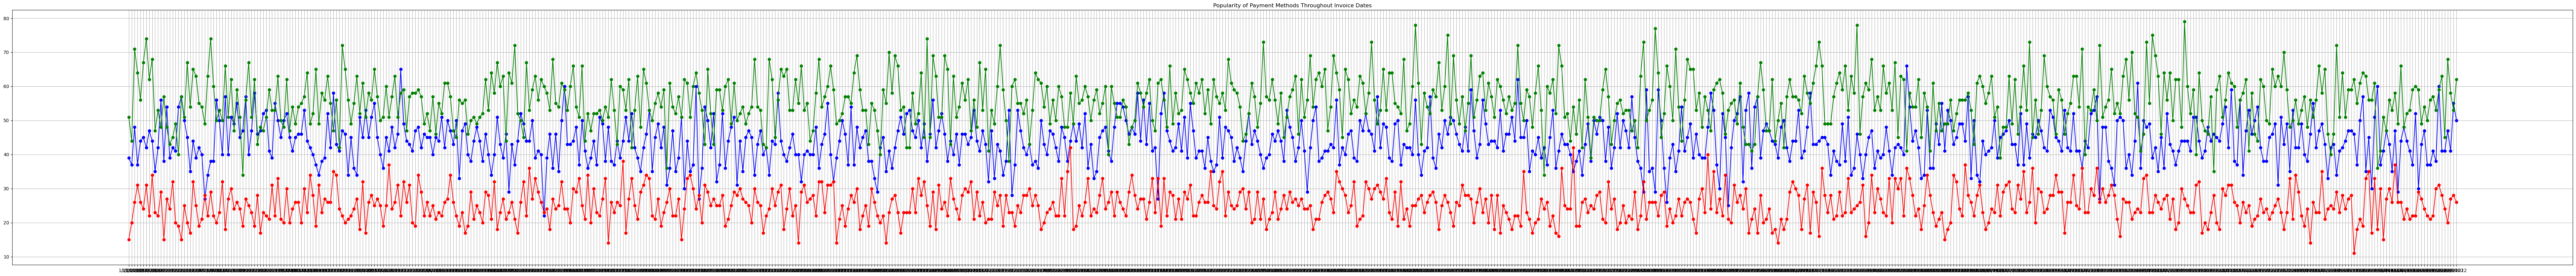

In [17]:
#Graphing the data per PAYMENT METHOD across INVOICE DATES

credit_card = date_data[date_data["payment_method"] == "Credit Card"]
graph_credit_card = credit_card["invoice_date"].value_counts(sort=False)

debit_card = date_data[date_data["payment_method"] == "Debit Card"]
graph_debit_card = debit_card["invoice_date"].value_counts(sort=False)

cash = date_data[date_data["payment_method"] == "Cash"]
graph_cash = cash["invoice_date"].value_counts(sort=False)

plt.figure(figsize = (100,10))
plt.plot(graph_credit_card, '-o', color='blue')
plt.plot(graph_debit_card, '-o', color='red')
plt.plot(graph_cash, '-o', color='green')
plt.grid(True)
plt.title('Popularity of Payment Methods Throughout Invoice Dates')

Throughout the invoice dates, cash is the most popular payment method followed by credit card, then debit. There is no seasonal pattern in the popularity of payment method as cash is consistently, the most preferred payment method throughout the data.

Text(0.5, 1.0, 'Popularity of Categories throughout Invoice Dates')

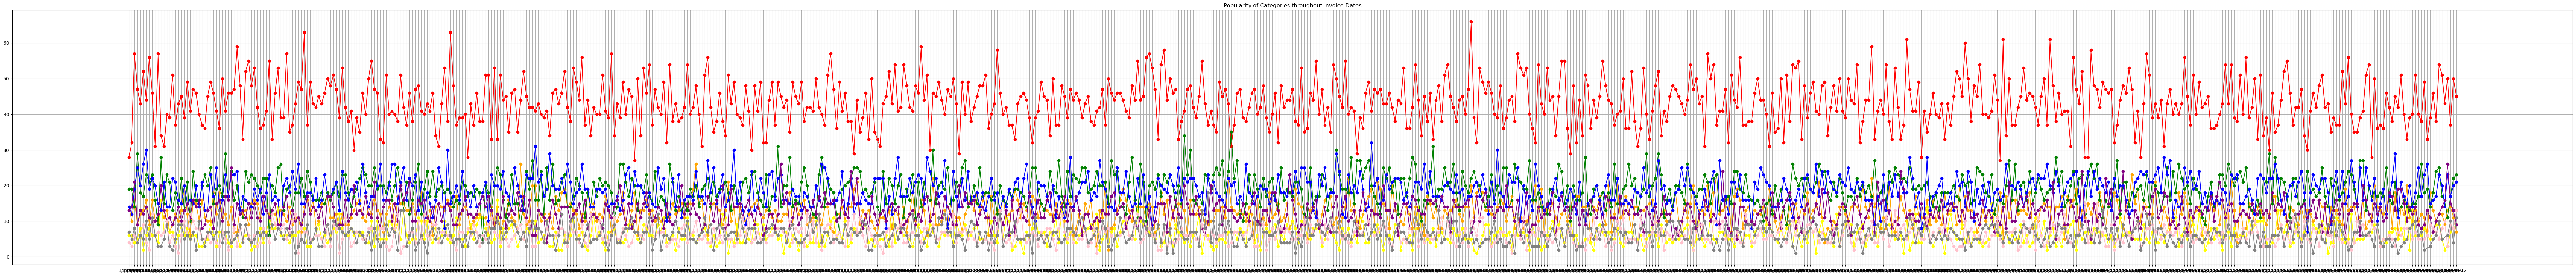

In [10]:
#Graphing the data per CATEGORY throughout INVOICE DATES

clothing = date_data[date_data["category"] == "Clothing"]
graph_clothing = clothing["invoice_date"].value_counts(sort=False)

shoes = date_data[date_data["category"] == "Shoes"]
graph_shoes = shoes["invoice_date"].value_counts(sort=False)

books = date_data[date_data["category"] == "Books"]
graph_books = books["invoice_date"].value_counts(sort=False)

cosmetics = date_data[date_data["category"] == "Cosmetics"]
graph_cosmetics = cosmetics["invoice_date"].value_counts(sort=False)


foodbev = date_data[date_data["category"] == "Food & Beverage"]
graph_foodbev = foodbev["invoice_date"].value_counts(sort=False)

toys = date_data[date_data["category"] == "Toys"]
graph_toys = toys["invoice_date"].value_counts(sort=False)

tech = date_data[date_data["category"] == "Technology"]
graph_tech = tech["invoice_date"].value_counts(sort=False)

souvenir = date_data[date_data["category"] == "Souvenir"]
graph_souvenir = souvenir["invoice_date"].value_counts(sort=False)

import matplotlib.pyplot as plt

plt.figure(figsize = (100,10))
plt.plot(graph_clothing, '-o', color='red')
plt.plot(graph_shoes, '-o', color='orange')
plt.plot(graph_books, '-o', color='yellow')
plt.plot(graph_cosmetics, '-o', color='green')
plt.plot(graph_foodbev, '-o', color='blue')
plt.plot(graph_toys, '-o', color='purple')
plt.plot(graph_tech, '-o', color='pink')
plt.plot(graph_souvenir, '-o', color='grey')
plt.grid(True)
plt.title('Popularity of Categories throughout Invoice Dates')

Throughout the data, clothing is the most popular category of items purchased by customers; its number of transactions are significantly greater than the other categories, no matter the time of year. The other categories are close in number of transactions to one another, though there is a significant difference in the number of transactions of food and beverages compared to books. Each category's popularity remains the same throughout the data, more or less.

# Hard

In [19]:
#Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

#Creating a sales column



invoice_no  customer_id   category  quantity    price payment_method  \
0        I138884          229   Clothing         5  1500.40    Credit Card   
1        I126377          229  Cosmetics         2    81.32    Credit Card   
2        I178419          229      Shoes         3  1800.51     Debit Card   
3        I847727          229   Clothing         3   900.24    Credit Card   
4        I219251          229      Shoes         5  3000.85    Credit Card   
...          ...          ...        ...       ...      ...            ...   
99452    I198027         4973      Shoes         1   600.17           Cash   
99453    I989120         6161      Books         5    75.75           Cash   
99454    I791963         6779   Clothing         5  1500.40    Credit Card   
99455    I100582         8386   Clothing         2   600.16           Cash   
99456    I934204         4761  Cosmetics         4   162.64           Cash   

      invoice_date   shopping_mall  Unnamed: 0   age first_name gender  \
0         5/8/2022          Kanyon         229   NaN    William      M   
1         5/4/2021       Metrocity         229   NaN    William      M   
2         1/6/2021    Istinye Park         229   NaN    William      M   
3       21/08/2022    Zorlu Center         229   NaN    William      M   
4       23/06/2022    Istinye Park         229   NaN    William      M   
...            ...             ...         ...   ...        ...    ...   
99452    8/11/2021          Kanyon        4593   NaN    Melissa      F   
99453     8/1/2021  Viaport Outlet        4998  36.0     Leslie      F   
99454     6/3/2021    Metropol AVM        5092   NaN      Kelly      F   
99455    2/11/2021    Istinye Park        5172  47.0      Shawn      M   
99456   31/08/2022  Forum Istanbul        4481  52.0     Ashley      F   

      last_name  
0      Anderson  
1      Anderson  
2      Anderson  
3      Anderson  
4      Anderson  
...         ...  
99452      Bell  
99453      Bass  
99454   Roberts  
99455     Perez  
99456   Jackson  

[99457 rows x 13 columns]

In [3]:
#Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

age_range = pd.cut(new_data["age"],[0,10,19,29,39,49,59,69,79,89,99])
new_data.pivot_table("Sales", index="category", columns = age_range, aggfunc=["sum"])

sum                                                     \
age             (0, 10]    (10, 19]     (19, 29]     (29, 39]     (39, 49]   
category                                                                     
Books               0.0    12801.75     79461.75     84143.10     87203.40   
Clothing            0.0  1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics           0.0   109619.36    605915.32    723544.70    665034.96   
Food & Beverage     0.0    13582.31     73491.96     87246.86     89553.29   
Shoes               0.0   993281.35   5924878.24   7200839.66   7025590.02   
Souvenir            0.0    12375.15     54943.32     64092.72     66391.80   
Technology          0.0  1129800.00   5261550.00   6159300.00   5954550.00   
Toys                0.0    60426.24    385100.80    420582.40    390906.88   

                                                                            
age                 (49, 59]     (59, 69]    (69, 79]    (79, 89] (89, 99]  
category                                                                    
Books               74962.20     80476.80    54827.85    26664.00      0.0  
Clothing         10321851.76  10660642.08  7769371.28  4493698.00      0.0  
Cosmetics          587780.96    649990.76   419082.62   254531.60      0.0  
Food & Beverage     72425.04     80976.09    55050.98    31332.93      0.0  
Shoes             5852857.84   5978893.54  4480269.05  2628744.60      0.0  
Souvenir            54943.32     55025.43    38673.81    23718.06      0.0  
Technology        4435200.00   5471550.00  3638250.00  1946700.00      0.0  
Toys               345067.52    363955.20   273244.16   153932.80      0.0